<font size=8> IOT Project</font><br>
<font color= red size=5>Breast Cancer Diagnosis</font>
***
***
__BTECH IT <br>
SEM-IV <br>
2017-18__
-  A011 Sanchit Burkule
-  A024 Shrey Karani
-  A025 Faiz Khan


### Training-

In [1]:
import pandas as pd
import matplotlib as mp
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.grid_search import GridSearchCV
import tkinter
%matplotlib inline

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
cancer= load_breast_cancer()
df_features=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
f=df_features
d= cancer['target']
f_train, f_test, d_train, d_test = train_test_split(f, d, test_size=0.3, )
gamma_range = [10,1,0.1,0.01,0.001,0.0001]
C_range = [0.01,0.1,1,10,100,1000,10000]
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid,verbose=4)
grid.fit(f_train, d_train)
grid.best_params_
grid_predictions=grid.predict(f_test)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] C=0.01, gamma=10 ................................................
[CV] ....................... C=0.01, gamma=10, score=0.631579 -   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ....................... C=0.01, gamma=10, score=0.631579 -   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ....................... C=0.01, gamma=10, score=0.628788 -   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........................ C=0.01, gamma=1, score=0.631579 -   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........................ C=0.01, gamma=1, score=0.631579 -   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........................ C=0.01, gamma=1, score=0.628788 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=10 .................................................
[CV] ........................ C=0.1, gamma=10, score=0.631579 -   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ........................ C=0.1, gamma=10, score=0.628788 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.628788 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] 

[CV] ...................... C=1000, gamma=0.1, score=0.631579 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.631579 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.628788 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.631579 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.631579 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.628788 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.917293 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    1.3s finished


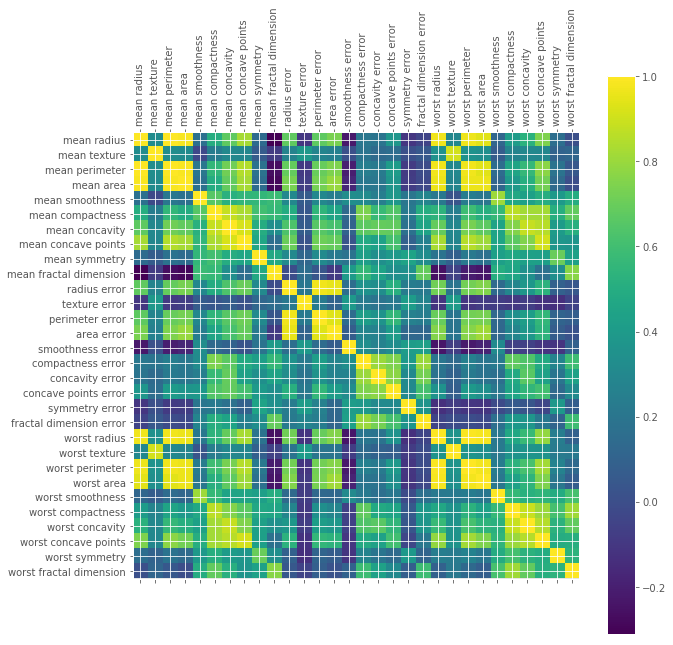

In [4]:
cor=f.corr()
mp.rcParams['figure.figsize'] = [10, 10]
mp.style.use('ggplot')
mp.pyplot.matshow(cor)
mp.pyplot.xticks(range(len(f.columns)), f.columns,rotation=90)
mp.pyplot.yticks(range(len(f.columns)), f.columns)
mp.pyplot.colorbar()
mp.pyplot.show()

In [5]:
print(classification_report(d_test,grid_predictions))
print(confusion_matrix(d_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.94      0.92      0.93        65
          1       0.95      0.96      0.96       106

avg / total       0.95      0.95      0.95       171

[[ 60   5]
 [  4 102]]


In [6]:
cm=confusion_matrix(d_test,grid_predictions)
tn=str(cm[0,0])
fn=str(cm[1,0])
fp=str(cm[0,1])
tp=str(cm[1,1])
master = tkinter.Tk()
master.geometry('250x200')
master.resizable(width=False, height=False)
master.configure(background='black')
tkinter.Label(master,bg="wheat2" , text="N =171").grid(row=0, column=20)
tkinter.Label(master, bg="wheat2",text="PREDICTED \n NO").grid(row=0, column=21)
tkinter.Label(master, text="PREDICTED \n YES",bg="wheat2").grid(row=0, column=22)
tkinter.Label(master, text="ACTUAL \n NO" ,bg="wheat2").grid(row=1, column=20)
tkinter.Label(master, bg='green', text="TN="+tn).grid(row=1, column=21)
tkinter.Label(master,bg='firebrick1', text="FP="+fp).grid(row=1, column=22)
tkinter.Label(master, bg='yellow',text=str(cm[0,0]+cm[0,1])).grid(row=1, column=23)
tkinter.Label(master, text="ACTUAL \n YES", bg="wheat2").grid(row=2, column=20)
tkinter.Label(master,bg='firebrick1', text="FN="+fn).grid(row=2, column=21)
tkinter.Label(master,bg='green', text="TP="+tp).grid(row=2, column=22)
tkinter.Label(master,bg='yellow', text=str(cm[1,0]+cm[1,1])).grid(row=2, column=23)
tkinter.Label(master,bg='yellow', text=str(cm[0,0]+cm[1,0])).grid(row=3, column=21)
tkinter.Label(master,bg='yellow', text=str(cm[0,1]+cm[1,1])).grid(row=3, column=22)
tkinter.Label(master,bg='yellow', text="171").grid(row=3, column=23)
master.mainloop()

In [8]:
print("Enter Data\n")
candat=np.array([])
canfeat=cancer['feature_names']
for i in range(len(canfeat)): 
    inpux=float(input(canfeat[i]))
    candat= np.append(candat,inpux)
d1=zip(canfeat,candat)
d2=dict(d1)
df_test = pd.DataFrame(data=d2,index=[0])
df_test
grid_predictions2=grid.predict(df_test)
if(grid_predictions2[0]==0):
    print("--Benign--")
else:
    print("--Malignant--")

Enter Data

mean radius7.76
mean texture24.54
mean perimeter47.92
mean area181
mean smoothness0.05263
mean compactness0.04362
mean concavity0
mean concave points0
mean symmetry0.1587
mean fractal dimension0.05884
radius error0.3857
texture error1.428
perimeter error2.548
area error19.15
smoothness error0.007189
compactness error0.00466
concavity error0
concave points error0
symmetry error0.02676
fractal dimension error0.002783
worst radius9.456
worst texture30.37
worst perimeter59.16
worst area268.6
worst smoothness0.08996
worst compactness0.06444
worst concavity0
worst concave points0
worst symmetry0.2871
worst fractal dimension0.07039
--Benign--


In [ ]:
report = classification_report(d_test,grid_predictions)
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']

def classifaction_report_csv(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv('report.csv', index = False)
    
classifaction_report_csv(report)